In [11]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


#  Reading Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:

d=r'/content/drive/My Drive/Colab Notebooks/dt/preprocessed_data.csv'
data  = pd.read_csv(d)
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

# Splitting data into Train and cross validation(or test): Stratified Sampling

In [14]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train.shape

(73196, 8)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(73196, 8)
(73196,)
(36052, 8)
(36052,)


# Make Data Model Ready: encoding eassay, and project_title</h2>

<h2> Set1: TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer_essay_tfidf.fit(X_train['essay'].values) 

X_train_essay_tfidf = vectorizer_essay_tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


# Make Data Model Ready: encoding numerical, categorical features</h2>

## Encoding categorical features:

# School State

In [17]:
vectorizer_School_State = CountVectorizer()
vectorizer_School_State.fit(X_train['school_state'].values) 
X_train_state_ohe = vectorizer_School_State.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer_School_State.transform(X_test['school_state'].values)
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_School_State.get_feature_names())


After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


# teacher_prefix

In [18]:
vectorizer_teacher_prefix= CountVectorizer()
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values) 

X_train_teacher_ohe = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher_prefix.get_feature_names())

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


# project_grade_category

In [19]:
vectorizer_project_grade_category = CountVectorizer()
vectorizer_project_grade_category .fit(X_train['project_grade_category'].values)
X_train_grade_ohe = vectorizer_project_grade_category .transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_project_grade_category .get_feature_names())

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


# clean_categories

In [20]:
vectorizer_clean_categories = CountVectorizer()
vectorizer_clean_categories.fit(X_train['clean_categories'].values)
X_train_clean_categories_ohe = vectorizer_clean_categories.transform(X_train['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer_clean_categories.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(vectorizer_clean_categories.get_feature_names())

After vectorizations
(73196, 9) (73196,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


# clean_subcategories

In [21]:
vectorizer_clean_subcategories = CountVectorizer()
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values)
X_train_clean_subcategories_ohe = vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer_clean_subcategories.get_feature_names())

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


# Encoding categorical features:

# teacher_number_of_previously_posted_projects

In [22]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

StandardScaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(X_train['teacher_number_of_previously_posted_projects'].values.shape)
X_train_teacher_number_of_previously_posted_projects_norm = StandardScaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm = StandardScaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)



(73196,)
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


<h2>Price</h2>

In [23]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
StandardScaler.fit(X_train['price'].values.reshape(-1,1))
print(X_train['price'].values.shape)
X_train_price_norm = StandardScaler.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = StandardScaler.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)
print(X_train_price_norm)

(73196,)
After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)
[[-0.37847083]
 [ 0.00143937]
 [-0.55677672]
 ...
 [ 0.37156531]
 [-0.53050518]
 [ 1.38439789]]


# Sentiment scores(preprocessed_essay)



###Sentiment scores (preprocessed_essay) for X_train

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
s=[]
for i in X_train['essay'].values:
    ss = sid.polarity_scores(i)
    d=[]
    for k,v in ss.items():
      d.append(v)
    s.append(d)
print(len(s))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
73196


In [25]:
S=np.array(s)
S.shape

(73196, 4)

### Sentiment scores (preprocessed_essay) for X_test

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
s_test=[]
for i in X_test['essay'].values:
    ss = sid.polarity_scores(i)
    d=[]
    for k,v in ss.items():
      d.append(v)
    s_test.append(d)
print(len(s))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
73196


In [27]:

S_test=np.array(s_test)
s_test[0]

[0.038, 0.526, 0.436, 0.9974]

# Concatinating all the features

In [28]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe ,X_train_teacher_number_of_previously_posted_projects_norm ,X_train_price_norm,S)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm,S_test)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print(type(X_tr))

Final Data matrix
(73196, 5105) (73196,)
(36052, 5105) (36052,)
<class 'scipy.sparse.csr.csr_matrix'>


#Appling DecisionTreeClassifier these feature sets




# Find the best hyper paramter using k-fold cross validation(GridsearchCV)

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import math

neigh = DecisionTreeClassifier(class_weight = 'balanced')
parameters ={'max_depth': [1, 5, 10, 50], 'min_samples_split':  [5, 10, 100, 500]}

clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
print(results.columns)




Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')


In [98]:
results['mean_train_score']

0     0.549493
1     0.549493
2     0.549493
3     0.549493
4     0.641784
5     0.641740
6     0.641374
7     0.640588
8     0.739847
9     0.738009
10    0.723423
11    0.704251
12    0.983971
13    0.977025
14    0.919554
15    0.833666
Name: mean_train_score, dtype: float64

###Find the best hyper paramter

In [99]:

best_param_tfidf=clf.best_params_
best_param_tfidf

{'max_depth': 10, 'min_samples_split': 500}

In [100]:
print(clf.score(X_tr,y_train))


0.7043570871046457


# 3D plot the performance of model both on train data and cross validation data for each hyper parameter

In [32]:
#https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [33]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
configure_plotly_browser_state()

depth=[1, 5, 10, 50]
min_samples_split=[5, 10, 100, 500]
x=[]
for i in min_samples_split:
  for j in range(len(depth)):
    x.append(i)
print(x)

y=[]
for j in range(len(min_samples_split)):
  for k in depth:
      y.append(k)
print(y)

z1 =  results['mean_train_score']

z2 =  results['mean_test_score']

trace1 = go.Scatter3d(x=x,y=y,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x,y=y,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')


[5, 5, 5, 5, 10, 10, 10, 10, 100, 100, 100, 100, 500, 500, 500, 500]
[1, 5, 10, 50, 1, 5, 10, 50, 1, 5, 10, 50, 1, 5, 10, 50]


# Heat map of the performance of model both on train data and cross validation data for each hyper parameter

In [34]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-max/
score = pd.DataFrame (results.groupby(['param_min_samples_split', 'param_max_depth']).max())
score.head(5)

mean_fit_time  ...  std_train_score
param_min_samples_split param_max_depth                 ...                 
5                       1                     1.116479  ...         0.002519
                        5                     5.230120  ...         0.003132
                        10                   14.668693  ...         0.003990
                        50                   88.303642  ...         0.001790
10                      1                     1.109864  ...         0.002519

[5 rows x 20 columns]

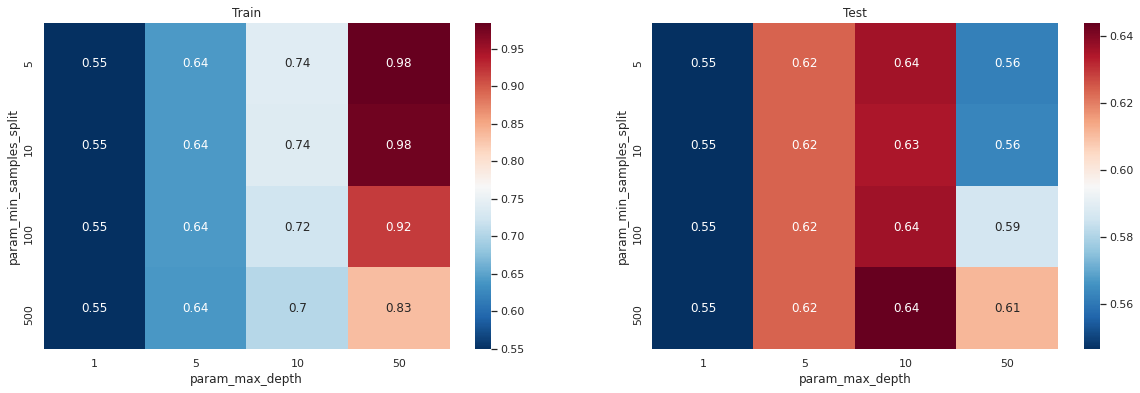

In [35]:
import seaborn as sns; sns.set()


score = pd.DataFrame (results.groupby(['param_min_samples_split', 'param_max_depth']).max().unstack())
fig, axs = plt.subplots(1,2,figsize=(20,6))

sns.heatmap(score['mean_train_score'],  annot=True,cmap='RdBu_r',ax=axs[0])
sns.heatmap(score['mean_test_score'], annot=True,cmap='RdBu_r',ax=axs[1])
axs[0].set_title('Train')
axs[1].set_title('Test')

plt.show()

In [38]:
best_param

{'max_depth': 10, 'min_samples_split': 500}

# Find the AUC and plot the ROC

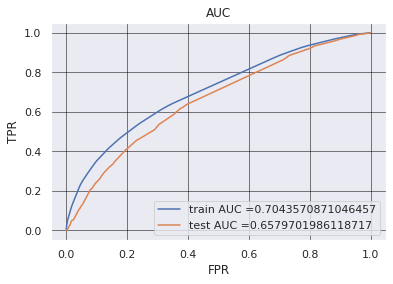

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

neigh = DecisionTreeClassifier(max_depth=best_param_tfidf['max_depth'],min_samples_split=best_param_tfidf['min_samples_split'],class_weight='balanced')
neigh.fit(X_tr, y_train)

y_train_pred = neigh.predict_proba(X_tr)[:,1]    
y_test_pred = neigh.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.legend()
plt.show()

#Confusion Matrix


In [102]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [103]:

neigh = DecisionTreeClassifier(max_depth=best_param_tfidf['max_depth'],min_samples_split=best_param_tfidf['min_samples_split'],class_weight='balanced')
neigh.fit(X_tr, y_train)
y_train_pred = neigh.predict_proba(X_tr)[:,1]     
y_test_pred = neigh.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


In [104]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.420568494685546 for threshold 0.476
Train confusion matrix
[[ 7582  3501]
 [23928 38185]]
Test confusion matrix
[[ 3463  1996]
 [12069 18524]]


Confusion Matrix: Train


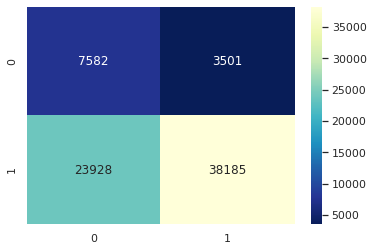

Confusion Matrix: Test


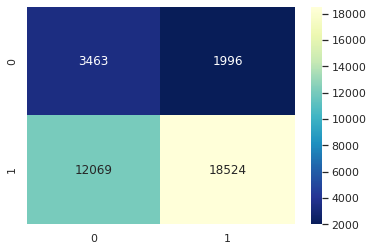

In [105]:
print('Confusion Matrix: Train')
cm_tr=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGnBu_r')
plt.show()

print('Confusion Matrix: Test')
cm_tr=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGnBu_r')
plt.show()

# Find the words of essay text of false positive data points`

In [106]:
y_test_pred=predict_with_best_t(y_test_pred, best_t)
type(y_test_pred)

False_pstv=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
print(len(False_pstv))


1996


# Plot the WordCloud

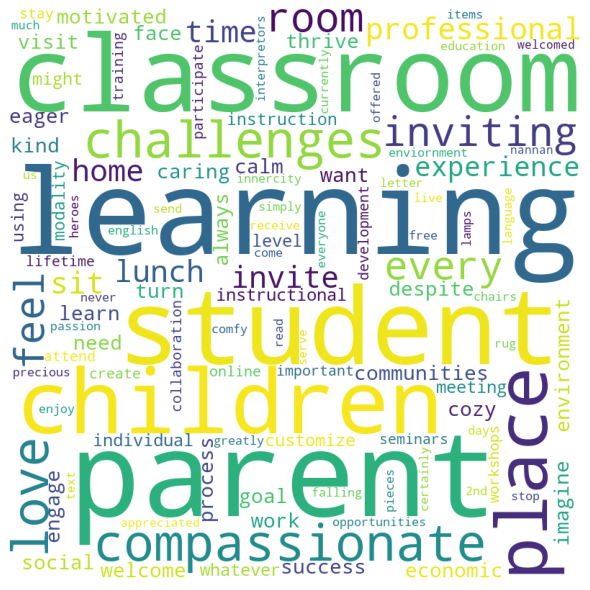

In [107]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in False_pstv: 
      
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Box plot with the `price` of these `false positive data points`

1996


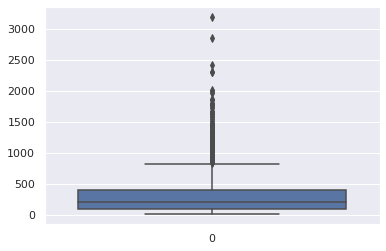

In [108]:

y_test_pred=predict_with_best_t(y_test_pred, best_t)
type(y_test_pred)

False_pstv=[]
False_pstv_price=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
    False_pstv_price.append(X_test['price'].values[i])
print(len(False_pstv_price))
sns.boxplot( data=False_pstv_price)


# Pdf plot with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [109]:
y_test_pred=predict_with_best_t(y_test_pred, best_t)
type(y_test_pred)

False_pstv=[]
False_pstv_teacher_number_of_previously_posted_projects=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
    False_pstv_teacher_number_of_previously_posted_projects.append(X_test['teacher_number_of_previously_posted_projects'].values[i])
print(len(False_pstv_teacher_number_of_previously_posted_projects))



1996


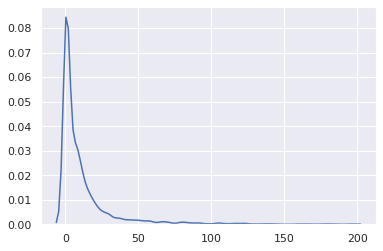

In [113]:
sns.distplot(False_pstv_teacher_number_of_previously_posted_projects,hist=False)

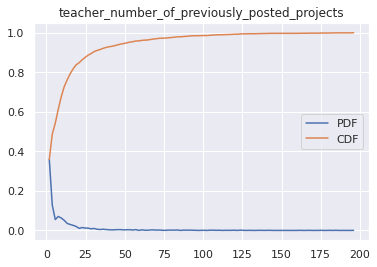

In [53]:
#https://jiffyclub.github.io/numpy/reference/generated/numpy.histogram.html

counts, bin_edges = np.histogram(False_pstv_teacher_number_of_previously_posted_projects, bins='auto', 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF','CDF'])
plt.title('teacher_number_of_previously_posted_projects')
plt.show();

# Set1: TFIDF W2V

In [149]:
#please use below code to load glove vectors 

#model = loadGloveModel('/content/drive/My Drive/Colab Notebooks/dt/glove_vectors')
import pickle 
with open('/content/drive/My Drive/Colab Notebooks/dt/gloveFile', 'rb') as f:
  model = pickle.load(f)
  glove_words =  set(model.keys())
len(glove_words)

51510

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(max_features=5000,max_df=10)
TfidfVectorizer.fit(X_train['essay'].values)
print(len(list(TfidfVectorizer.idf_)))
dictionary = dict(zip(TfidfVectorizer.get_feature_names(), list(TfidfVectorizer.idf_)))
tfidf_feat = TfidfVectorizer.get_feature_names() 

5000


In [154]:
def tfidf_w2v(list_of_sentance):
  tfidf_sent_vectors = []
  for sent in list_of_sentance: 
      sent_vec1 = np.zeros(300)
      weight_sum =0
      for word in sent.split(): 
          if (word in glove_words) and (word in tfidf_feat):
              vec = model[word]
              tf_idf = dictionary[word]*(sent.count(word)/len(sent))
              sent_vec1 += (vec * tf_idf)
              weight_sum += tf_idf
      if weight_sum != 0:
          sent_vec1 /= weight_sum
      tfidf_sent_vectors.append(sent_vec1)
  return np.array(tfidf_sent_vectors)

In [155]:
X_train_essay_tfidf_w2v=tfidf_w2v(X_train['essay'].values)
X_test_essay_tfidf_w2v=tfidf_w2v(X_test['essay'])
print(X_train_essay_tfidf_w2v.shape, y_train.shape)
print(X_test_essay_tfidf_w2v.shape, y_test.shape)


(73196, 300) (73196,)
(36052, 300) (36052,)


#Concatinating all the features

In [118]:
from scipy.sparse import hstack
X_tr_tfidf_w2v = hstack((X_train_essay_tfidf_w2v, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe ,X_train_teacher_number_of_previously_posted_projects_norm ,X_train_price_norm,S)).tocsr()
X_te_fidf_w2v = hstack((X_test_essay_tfidf_w2v, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm,S_test)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf_w2v.shape, y_train.shape)
print(X_te_fidf_w2v.shape, y_test.shape)
print(type(X_tr_tfidf_w2v))

Final Data matrix
(73196, 405) (73196,)
(36052, 405) (36052,)
<class 'scipy.sparse.csr.csr_matrix'>


#Appling DecisionTreeClassifier these feature sets




# Find the best hyper paramter using k-fold cross validation(GridsearchCV)

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

neigh = DecisionTreeClassifier(class_weight = 'balanced')
parameters ={'max_depth': [1, 5, 10, 50], 'min_samples_split':  [5, 10, 100, 500]}

clf_tfidf_w2v = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
clf_tfidf_w2v.fit(X_tr_tfidf_w2v, y_train)

results_tfidf_w2v = pd.DataFrame.from_dict(clf_tfidf_w2v.cv_results_)
print(results_tfidf_w2v.columns)




Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')


###Find the best hyper paramter

In [120]:

best_param_tfidf_w2v=clf_tfidf_w2v.best_params_
best_param_tfidf_w2v

{'max_depth': 5, 'min_samples_split': 500}

In [121]:
print(clf_tfidf_w2v.score(X_tr_tfidf_w2v,y_train))


0.6213795340735396


# 3D plot the performance of model both on train data and cross validation data for each hyper parameter

In [122]:
#https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [123]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
configure_plotly_browser_state()

depth=[1, 5, 10, 50]
min_samples_split=[5, 10, 100, 500]
x=[]
for i in min_samples_split:
  for j in range(len(depth)):
    x.append(i)
print(x)

y=[]
for j in range(len(min_samples_split)):
  for k in depth:
      y.append(k)
print(y)

z1 =  results_tfidf_w2v['mean_train_score']

z2 =  results_tfidf_w2v['mean_test_score']

trace1 = go.Scatter3d(x=x,y=y,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x,y=y,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')


[5, 5, 5, 5, 10, 10, 10, 10, 100, 100, 100, 100, 500, 500, 500, 500]
[1, 5, 10, 50, 1, 5, 10, 50, 1, 5, 10, 50, 1, 5, 10, 50]


#Heat map of the performance of model both on train data and cross validation data for each hyper parameter

In [124]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-max/
score = pd.DataFrame (results_tfidf_w2v.groupby(['param_min_samples_split', 'param_max_depth']).max())
score.head(5)

mean_fit_time  ...  std_train_score
param_min_samples_split param_max_depth                 ...                 
5                       1                     1.006969  ...         0.005557
                        5                     4.888003  ...         0.001435
                        10                   13.214478  ...         0.003486
                        50                   58.559277  ...         0.000177
10                      1                     0.981123  ...         0.005557

[5 rows x 20 columns]

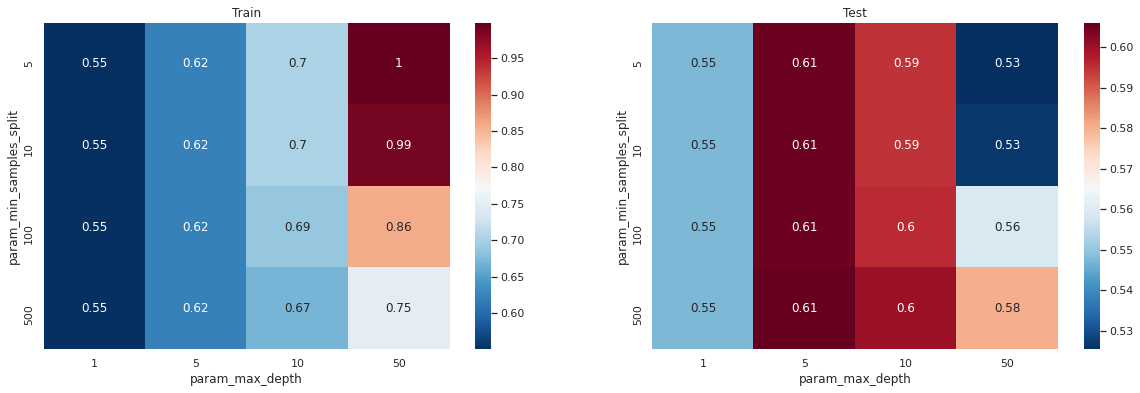

In [125]:
import seaborn as sns; sns.set()


score = pd.DataFrame (results_tfidf_w2v.groupby(['param_min_samples_split', 'param_max_depth']).max().unstack())
fig, axs = plt.subplots(1,2,figsize=(20,6))

sns.heatmap(score['mean_train_score'],  annot=True,cmap='RdBu_r',ax=axs[0])
sns.heatmap(score['mean_test_score'], annot=True,cmap='RdBu_r',ax=axs[1])
axs[0].set_title('Train')
axs[1].set_title('Test')

plt.show()

In [126]:
best_param_tfidf_w2v

{'max_depth': 5, 'min_samples_split': 500}

# Find the AUC and plot the ROC

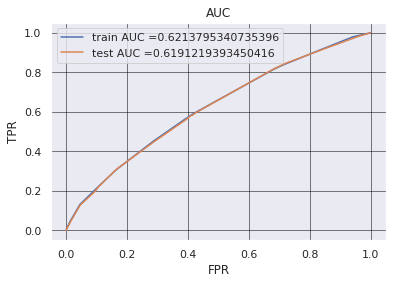

In [127]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

neigh = DecisionTreeClassifier(max_depth=best_param_tfidf_w2v['max_depth'],min_samples_split=best_param_tfidf_w2v['min_samples_split'],class_weight='balanced')
neigh.fit(X_tr_tfidf_w2v, y_train)

y_train_pred_tfidf_w2v = neigh.predict_proba(X_tr_tfidf_w2v)[:,1]    
y_test_pred_tfidf_w2v = neigh.predict_proba(X_te_fidf_w2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_tfidf_w2v)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_tfidf_w2v)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.legend()
plt.show()

#Confusion Matrix


In [128]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [129]:

neigh = DecisionTreeClassifier(max_depth=best_param_tfidf_w2v['max_depth'],min_samples_split=best_param_tfidf_w2v['min_samples_split'],class_weight='balanced')
neigh.fit(X_tr_tfidf_w2v, y_train)
y_train_pred_tfidf_w2v = neigh.predict_proba(X_tr_tfidf_w2v)[:,1]     
y_test_pred_tfidf_w2v = neigh.predict_proba(X_te_fidf_w2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_tfidf_w2v)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_tfidf_w2v)


In [130]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf_w2v, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf_w2v, best_t)))

the maximum value of tpr*(1-fpr) 0.3442749419954692 for threshold 0.508
Train confusion matrix
[[ 6548  4535]
 [25919 36194]]
Test confusion matrix
[[ 3222  2237]
 [12823 17770]]


Confusion Matrix: Train


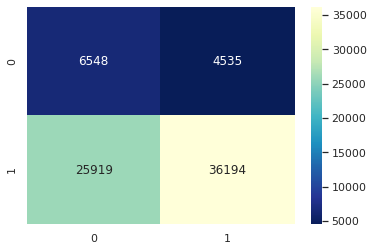

Confusion Matrix: Test


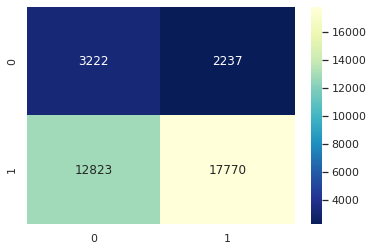

In [131]:
print('Confusion Matrix: Train')
cm_tr=confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf_w2v, best_t))
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGnBu_r')
plt.show()

print('Confusion Matrix: Test')
cm_tr=confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf_w2v, best_t))
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGnBu_r')
plt.show()

# Find the words of essay text of false positive data points`

In [132]:
y_test_pred=predict_with_best_t(y_test_pred_tfidf_w2v, best_t)
type(y_test_pred)

False_pstv=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
print(len(False_pstv))


2237


#Plot the WordCloud

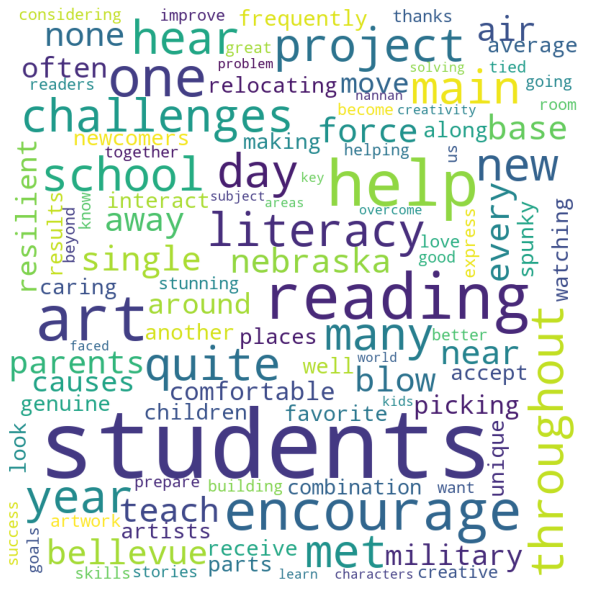

In [133]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in False_pstv: 
      
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Box plot with the `price` of these `false positive data points`

2237


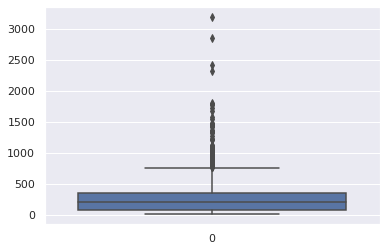

In [134]:

y_test_pred=predict_with_best_t(y_test_pred_tfidf_w2v, best_t)
type(y_test_pred)

False_pstv=[]
False_pstv_price=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
    False_pstv_price.append(X_test['price'].values[i])
print(len(False_pstv_price))
sns.boxplot( data=False_pstv_price)


#Pdf plot with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [135]:
y_test_pred=predict_with_best_t(y_test_pred_tfidf_w2v, best_t)
type(y_test_pred)

False_pstv=[]
False_pstv_teacher_number_of_previously_posted_projects=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
    False_pstv_teacher_number_of_previously_posted_projects.append(X_test['teacher_number_of_previously_posted_projects'].values[i])
print(len(False_pstv_teacher_number_of_previously_posted_projects))



2237


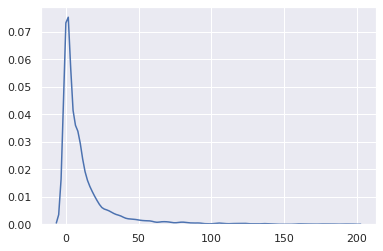

In [137]:
sns.distplot(False_pstv_teacher_number_of_previously_posted_projects,hist=False)

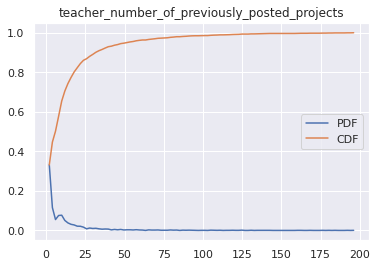

In [138]:
#https://jiffyclub.github.io/numpy/reference/generated/numpy.histogram.html

counts, bin_edges = np.histogram(False_pstv_teacher_number_of_previously_posted_projects, bins='auto', 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF','CDF'])
plt.title('teacher_number_of_previously_posted_projects')
plt.show();

# Feature Importance

In [139]:
neigh = DecisionTreeClassifier(max_depth= None,min_samples_split=best_param['min_samples_split'],class_weight='balanced')
neigh.fit(X_tr, y_train)
feature_importances=neigh.feature_importances_
feature_importances.shape


(5105,)

In [140]:
feature_importances

array([0.        , 0.00023676, 0.00062084, ..., 0.0037997 , 0.0014841 ,
       0.00209433])

#Features which are having non-zero feature importance

In [79]:
a={'feature_importance':list(feature_importances)}
test_data=pd.DataFrame.from_dict(a)
print(test_data[test_data['feature_importance'] != 0].index)
X_tr_Test= X_tr.toarray()
X_te_Test= X_te.toarray()
print(X_tr_Test)
X_tr_Test = np.delete(X_tr_Test,test_data[test_data['feature_importance'] == 0].index,axis=1)
X_te_Test = np.delete(X_te_Test,test_data[test_data['feature_importance'] == 0].index,axis=1)
print(X_tr_Test.shape)
print(X_te_Test.shape)

Int64Index([   2,    3,    5,   14,   21,   22,   24,   25,   27,   31,
            ...
            5044, 5078, 5089, 5098, 5099, 5100, 5101, 5102, 5103, 5104],
           dtype='int64', length=1178)
[[0.     0.     0.     ... 0.682  0.282  0.9864]
 [0.     0.     0.     ... 0.589  0.38   0.9939]
 [0.     0.     0.     ... 0.67   0.215  0.946 ]
 ...
 [0.     0.     0.     ... 0.685  0.294  0.9933]
 [0.     0.     0.     ... 0.71   0.253  0.979 ]
 [0.     0.     0.     ... 0.633  0.344  0.9971]]
(73196, 1178)
(36052, 1178)


#Appling DecisionTreeClassifier these feature sets

#Find the best hyper paramter using k-fold cross validation(GridsearchCV)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

neigh=LogisticRegression()

param=[.0001,.001,.01,.1,1,5,10,20,50,100,1000]
parameters={'C':param}

clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_Test, y_train)

results_logistic = pd.DataFrame.from_dict(clf.cv_results_)
print(results_logistic.columns)



Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


#Find the best hyper paramter

In [158]:
best_param_C=clf.best_params_
best_param_C

{'C': 1}

#Find the AUC and plot the ROC

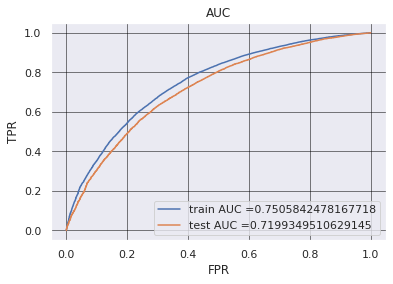

In [159]:

neigh = LogisticRegression(C=best_param_C['C'],class_weight='balanced' )
neigh.fit(X_tr_Test, y_train)

y_train_pred = neigh.predict_proba(X_tr_Test)[:,1]    
y_test_pred = neigh.predict_proba(X_te_Test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.legend()
plt.show()

#Confusion Matrix


In [160]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [161]:

neigh = LogisticRegression(C=best_param_C['C'],class_weight='balanced' )
neigh.fit(X_tr_Test, y_train)

y_train_pred = neigh.predict_proba(X_tr_Test)[:,1]    
y_test_pred = neigh.predict_proba(X_te_Test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


In [162]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4733945996116298 for threshold 0.486
Train confusion matrix
[[ 7575  3508]
 [19092 43021]]
Test confusion matrix
[[ 3530  1929]
 [ 9780 20813]]


Confusion Matrix: Train


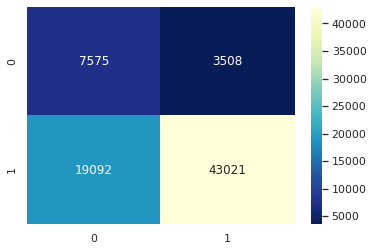

Confusion Matrix: Test


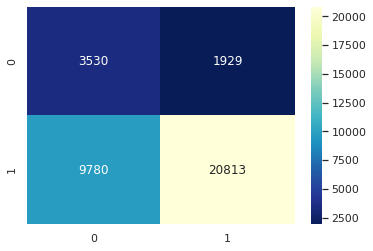

In [163]:
print('Confusion Matrix: Train')
cm_tr=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGnBu_r')
plt.show()

print('Confusion Matrix: Test')
cm_tr=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(cm_tr, annot=True,fmt="d",cmap='YlGnBu_r')
plt.show()

#Find the words of essay text of false positive data points`

In [164]:
y_test_pred=predict_with_best_t(y_test_pred, best_t)
type(y_test_pred)

False_pstv=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
print(len(False_pstv))


1929


#Plot the WordCloud

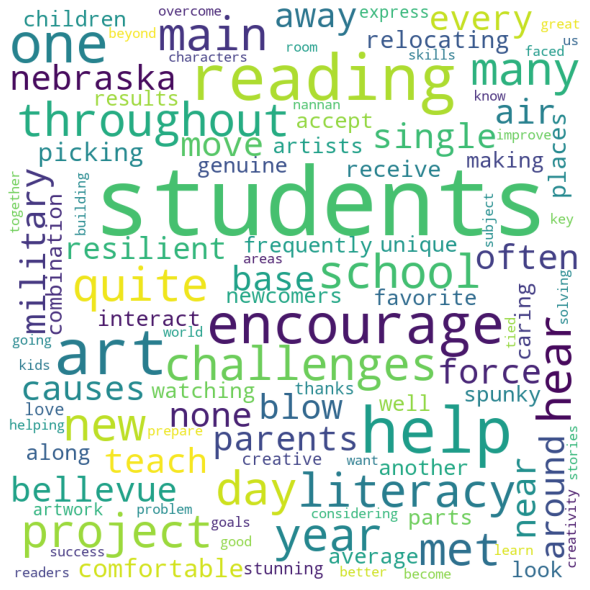

In [165]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in False_pstv: 
      
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#Box plot with the price of these false positive data points

1929


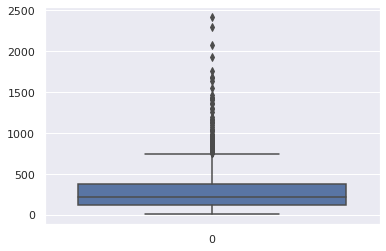

In [166]:

y_test_pred=predict_with_best_t(y_test_pred, best_t)
type(y_test_pred)

False_pstv=[]
False_pstv_price=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
    False_pstv_price.append(X_test['price'].values[i])
print(len(False_pstv_price))
sns.boxplot( data=False_pstv_price)


# Pdf plot with the `teacher_number_of_previously_posted_projects` of these `false positive data points`

In [168]:
y_test_pred=predict_with_best_t(y_test_pred, best_t)
type(y_test_pred)

False_pstv=[]
False_pstv_teacher_number_of_previously_posted_projects=[]

for i in range(len(y_test)):
  if y_test[i]==0 and y_test_pred[i]==1:
    False_pstv.append(X_test['essay'].values[i])
    False_pstv_teacher_number_of_previously_posted_projects.append(X_test['teacher_number_of_previously_posted_projects'].values[i])
print(len(False_pstv_teacher_number_of_previously_posted_projects))



1929


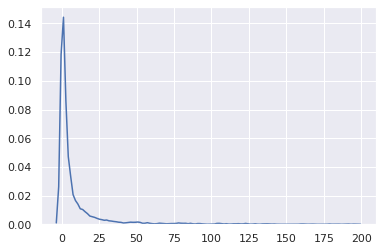

In [169]:
sns.distplot(False_pstv_teacher_number_of_previously_posted_projects,hist=False)

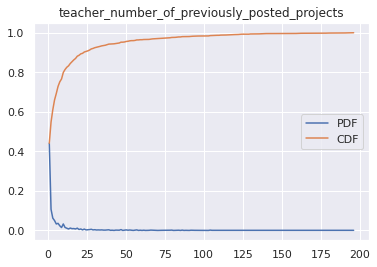

In [170]:
#https://jiffyclub.github.io/numpy/reference/generated/numpy.histogram.html

counts, bin_edges = np.histogram(False_pstv_teacher_number_of_previously_posted_projects, bins='auto', 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF','CDF'])
plt.title('teacher_number_of_previously_posted_projects')
plt.show();

# Conclusions







In [184]:
from prettytable import PrettyTable
conclusion = PrettyTable()
conclusion.field_names= ('Vectorizer' ,'model', 'Max_depth ', 'Min_sample_split' ,'C' ,'Test -AUC ')
conclusion.add_row(['Tf-Idf','DecisionTree', 10 , 500, None ,0.6579 ])
conclusion.add_row(['Tf-Idf-W2V', 'DecisionTree', 5 , 500, None, 0.6191])
conclusion.add_row(['Top Feature having non-zero feature importance','Logistic Regression', None, None, 1 , 0.7193 ])
print(conclusion)

+------------------------------------------------+---------------------+------------+------------------+------+------------+
|                   Vectorizer                   |        model        | Max_depth  | Min_sample_split |  C   | Test -AUC  |
+------------------------------------------------+---------------------+------------+------------------+------+------------+
|                     Tf-Idf                     |     DecisionTree    |     10     |       500        | None |   0.6579   |
|                   Tf-Idf-W2V                   |     DecisionTree    |     5      |       500        | None |   0.6191   |
| Top Feature having non-zero feature importance | Logistic Regression |    None    |       None       |  1   |   0.7193   |
+------------------------------------------------+---------------------+------------+------------------+------+------------+
